In [61]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm



In [62]:
# Load your dataset
data = pd.read_csv('/Meta_Stock_Analysis_Data.csv')



In [63]:
import pandas as pd

# Assuming your DataFrame is called 'data'

# Drop rows where 'Returns' column has null values
data.dropna(subset=['Returns'], inplace=True)

# Drop rows where 'VolumeMovingAverage_10' column has null values
data.dropna(subset=['VolumeMovingAverage_10'], inplace=True)

# Drop rows where 'PriceLag_1' column has null values
data.dropna(subset=['PriceLag_1'], inplace=True)

# Drop rows where 'ReturnLag_1' column has null values
data.dropna(subset=['ReturnLag_1'], inplace=True)

# Drop rows where 'PriceLag_3' column has null values
data.dropna(subset=['PriceLag_3'], inplace=True)

# Drop rows where 'ReturnLag_3' column has null values
data.dropna(subset=['ReturnLag_3'], inplace=True)

# Drop rows where 'PriceLag_5' column has null values
data.dropna(subset=['PriceLag_5'], inplace=True)

# Drop rows where 'ReturnLag_5' column has null values
data.dropna(subset=['ReturnLag_5'], inplace=True)


In [64]:
data.drop("Date", axis=1, inplace=True)

In [65]:
data['Volatility']=np.log10(data['Volatility'])
data['HighLowRange']=np.log10(data['HighLowRange'])
data['VolumeMovingAverage_10']=np.log10(data['VolumeMovingAverage_10'])
data['UNRATE']=np.log10(data['UNRATE'])

In [66]:
# Calculate the difference between Close and Open prices
data['PriceDiff'] = data['Close'] - data['Open']

# Create categorical variables for positive and negative differences
data['PriceDiff_Positive'] = data['PriceDiff'].apply(lambda x: 1 if x > 0 else 0)
data['PriceDiff_Negative'] = data['PriceDiff'].apply(lambda x: 1 if x < 0 else 0)

# Drop the original 'PriceDiff' column if needed
data.drop('PriceDiff', axis=1, inplace=True)


In [67]:
print(data.columns)

Index(['Unnamed: 0', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Returns', 'MovingAverage_50', 'MovingAverage_200', 'VolumeChange',
       'VolumeMovingAverage_50', 'VolumeMovingAverage_200', 'MarketReturns',
       'CAPM', 'HighLowRange', 'HighCloseRange', 'LowCloseRange', 'Volatility',
       'RSI', 'Momentum', 'VolumeMovingAverage_10', 'PriceLag_1',
       'ReturnLag_1', 'PriceLag_3', 'ReturnLag_3', 'PriceLag_5', 'ReturnLag_5',
       'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'ADS_Index', 'UNRATE',
       '('Adj Close', 'SNAP')', '('Adj Close', 'TCEHY')', '('Close', 'SNAP')',
       '('Close', 'TCEHY')', '('High', 'SNAP')', '('High', 'TCEHY')',
       '('Low', 'SNAP')', '('Low', 'TCEHY')', '('Open', 'SNAP')',
       '('Open', 'TCEHY')', '('Volume', 'SNAP')', '('Volume', 'TCEHY')',
       'PriceDiff_Positive', 'PriceDiff_Negative'],
      dtype='object')


In [68]:
columns_to_keep = ['Open','Volume','VolumeChange','CAPM','Momentum','MovingAverage_50', 'Volatility', 'PriceLag_1','ReturnLag_5', 'PriceDiff_Negative']

  #['Open', 'MovingAverage_50', 'HighLowRange', 'Volatility', 'PriceLag_1', "('High', 'TCEHY')", "('Low', 'SNAP')",'PriceDiff_Positive']

# Assuming your DataFrame is named 'df'
data = data[columns_to_keep].reset_index(drop=True)


In [69]:
data.head()

,Open,Volume,VolumeChange,CAPM,Momentum,MovingAverage_50,Volatility,PriceLag_1,ReturnLag_5,PriceDiff_Negative
0,28.889999,41855500,-0.625082,0.019913,NaN,NaN,0.069421,29.600000,0.032187,1
1,27.200001,35230300,-0.158287,0.019948,-11.330000,NaN,-0.093306,27.719999,-0.033909,1
2,26.700001,42473400,0.205593,0.019939,-8.159998,NaN,0.127105,26.900000,-0.096208,1
3,26.070000,61489200,0.447711,0.020017,-4.190001,NaN,0.041393,25.870001,-0.022538,0
4,27.000000,26159500,-0.574568,0.019960,-5.690001,NaN,-0.096910,26.809999,0.050018,1


In [70]:
#Since we are getting an error suggesting nans or infs or out of range nums exist.
#since we know no nulls are present we are trying to remove any infs if present.
data.replace([np.inf, -np.inf], np.nan)

data.dropna(inplace=True)

In [71]:
data.head()

,Open,Volume,VolumeChange,CAPM,Momentum,MovingAverage_50,Volatility,PriceLag_1,ReturnLag_5,PriceDiff_Negative
40,24.000000,29285900,-0.762101,0.019954,-5.100000,29.8390,-0.171770,23.709999,-0.000348,1
41,23.370001,56179400,0.918309,0.019914,-6.380001,29.5086,0.069421,23.150000,-0.010435,1
42,21.500000,44604400,-0.206036,0.019939,-8.230001,29.2456,-0.306860,21.709999,0.031283,1
43,20.770000,56374500,0.263878,0.019937,-8.959999,29.0264,-0.167491,20.879999,-0.084867,1
44,20.360001,80647000,0.430558,0.020034,-7.670000,28.8082,0.178017,20.040001,-0.116946,0


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Split the data into features (X) and target variable (y)
X = data.drop('PriceDiff_Negative', axis=1)
y = data['PriceDiff_Negative']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X = pd.DataFrame(scaled_data, columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
logreg_pred = logreg.predict(X_test_scaled)
logreg_cm = confusion_matrix(y_test, logreg_pred)
print("Logistic Regression Confusion Matrix:")
print(logreg_cm)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_cm = confusion_matrix(y_test, rf_pred)
print("Random Forest Confusion Matrix:")
print(rf_cm)


Logistic Regression Confusion Matrix:
[[240  35]
 [ 39 227]]
Random Forest Confusion Matrix:
[[236  39]
 [ 42 224]]


In [75]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

# Split the data into features (X) and target variable (y)
X = data.drop('PriceDiff_Negative', axis=1)
y = data['PriceDiff_Negative']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_cm = confusion_matrix(y_test, xgb_pred)
print("XGBoost Confusion Matrix:")
print(xgb_cm)




XGBoost Confusion Matrix:
[[237  38]
 [ 46 220]]


In [76]:
from sklearn.model_selection import cross_val_score, GridSearchCV


In [77]:
logreg_params = {'C': [0.1, 1.0, 10.0]}
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}


In [78]:
logreg = LogisticRegression(max_iter=1000)
logreg_grid = GridSearchCV(logreg, logreg_params, cv=5)
logreg_grid.fit(X_train, y_train)

# Print the best hyperparameters and best score
print("Logistic Regression - Best Hyperparameters: ", logreg_grid.best_params_)
print("Logistic Regression - Best Score: ", logreg_grid.best_score_)


Logistic Regression - Best Hyperparameters:  {'C': 0.1}
Logistic Regression - Best Score:  0.5143251218886322


In [79]:
rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, rf_params, cv=5)
rf_grid.fit(X_train, y_train)

# Print the best hyperparameters and best score
print("Random Forest - Best Hyperparameters: ", rf_grid.best_params_)
print("Random Forest - Best Score: ", rf_grid.best_score_)


Random Forest - Best Hyperparameters:  {'max_depth': 5, 'n_estimators': 300}
Random Forest - Best Score:  0.8470351124796853


In [80]:
logreg_best = LogisticRegression(**logreg_grid.best_params_)
logreg_best.fit(X_train, y_train)
logreg_pred = logreg_best.predict(X_test)
logreg_cm = confusion_matrix(y_test, logreg_pred)
print("Logistic Regression Confusion Matrix:")
print(logreg_cm)

rf_best = RandomForestClassifier(**rf_grid.best_params_)
rf_best.fit(X_train, y_train)
rf_pred = rf_best.predict(X_test)
rf_cm = confusion_matrix(y_test, rf_pred)
print("Random Forest Confusion Matrix:")
print(rf_cm)


Logistic Regression Confusion Matrix:
[[275   0]
 [266   0]]
Random Forest Confusion Matrix:
[[238  37]
 [ 41 225]]


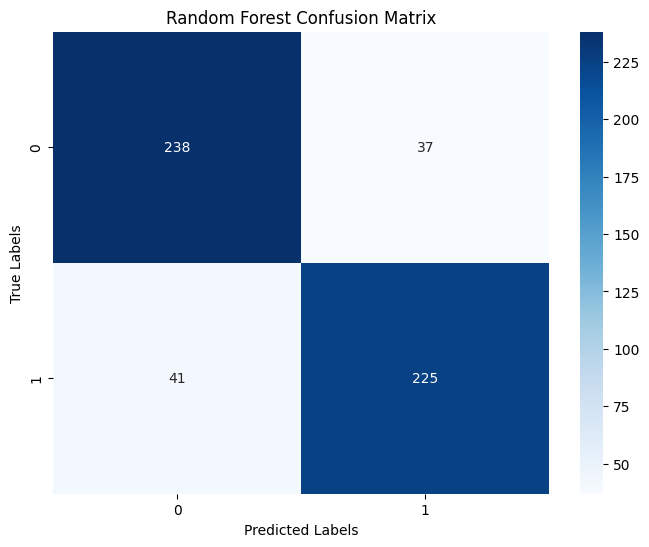

In [81]:
# Plot Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()